# Introduction

Gamma rays represent an object of utmost interest in astrophysics, as they allow us to characterize various highly energetic phenomena occurring in space, such as supernovae, pulsars, or AGNs.

In this work, we will analyze gamma-ray detection through three experiments: the Energetic Gamma Ray Experiment Telescope (EGRET), the Burst and Transient Source Experiment (BATSE), and the Fermi Gamma-ray Burst Monitor (Fermi GBM). Each detects gamma rays differently, thus providing distinct information.

EGRET focuses on a highly energetic band (20 MeV to 30 GeV), while BATSE monitors nearly the entire sky and is better suited for transient events. Finally, Fermi stands out for its excellent temporal and energy resolution, enabling detailed spectral studies.

# Libraries

In this work, we will employ several libraries for data manipulation and visualization. We will use Vizier to access astronomical catalogs, Pandas for processing tabular data, and mw_plot to generate face-on maps of the Milky Way. Additionally, we will utilize specialized libraries from the Fermi Gamma-ray Burst Monitor Data Tools (GDT) package to analyze Fermi experiment data.

In [2]:
from astroquery.vizier import Vizier
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
import numpy as np
from mw_plot import MWSkyMap
from pywwt.jupyter import connect_to_app
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from gdt.core import data_path
from gdt.missions.fermi.gbm.tte import GbmTte
from gdt.core.binning.binned import combine_by_factor
from gdt.core.plot.spectrum import Spectrum
from gdt.core.binning.unbinned import bin_by_time
from gdt.core.plot.lightcurve import Lightcurve
import matplotlib.pyplot as plt

# Egret

Vizier will provide us with access to a wide variety of astronomical catalogs. We will start by searching for catalogs by entering the word 'egret' to retrieve data from the Energetic Gamma Ray Experiment Telescope (EGRET).

In [6]:
vizier = Vizier()
catalog_list = vizier.find_catalogs('egret')
for k, v in catalog_list.items():
    print(k, ":", v.description)

I/196 : Hipparcos Input Catalogue, Version 2 (Turon+ 1993)
I/197A : Tycho Input Catalogue, Revised version (Egret+ 1992)
I/207 : Preliminary list from Tycho observations (TIC data) (Halbwachs+ 1994)
II/228A : DENIS Catalogue toward Magellanic Clouds (DCMC) (Cioni+ 2000)
II/240 : The DENIS database first release (Epchtein+, 1999)
II/243 : The ISOGAL Point Source Catalogue - IGPSC (Omont+ 2003)
III/67A : Catalogue of Be stars (Jaschek+, 1982)
III/68 : List of Early-Type Chemically Peculiar Stars (Egret+ 1981)
III/83 : IUE Low-Dispersion Reference Atlas I, Normal Stars (Heck+ 1984)
IV/33 : Master Catalogue towards the Magellanic Clouds (MC2) (Delmotte+ 2002)
V/14 : Estimated astrophysical parameters from uvby (Philip+ 1980)
V/17A : A list of Supergiant Stars (Egret 1980)
J/ApJ/481/95 : Radio identification of EGRET sources (Mattox+ 1997)
J/ApJ/657/706 : EGRET blazar gamma-ray spectrum (Nandikotkur+, 2007)
J/ApJ/671/1355 : EGRET blazars in VIPS (Taylor+, 2007)
J/ApJS/101/259 : The second E

To display all the data, we will set 'ROW_LIMIT' to -1. We want a specific catalog, the one corresponding to 'J/ApJS/123/79'. This will show us a set of tables containing the data.

In [7]:
vizier.ROW_LIMIT = -1
egret = vizier.get_catalogs("J/ApJS/123/79")
egret

TableList with 5 tables:
	'0:J/ApJS/123/79/3eg' with 10 column(s) and 271 row(s) 
	'1:J/ApJS/123/79/fluxes' with 9 column(s) and 5245 row(s) 
	'2:J/ApJS/123/79/table1' with 7 column(s) and 169 row(s) 
	'3:J/ApJS/123/79/notes' with 2 column(s) and 112 row(s) 
	'4:J/ApJS/123/79/refs' with 2 column(s) and 27 row(s) 

We will take the first table since it contains the main information about the sources, such as their name, type, and RA/Dec position. To visualize and manipulate the table, we will use pandas. To do this, we will convert the catalog table into a pandas DataFrame.

In [4]:
df_egret = egret[0].to_pandas()
df_egret

,3EG,RAJ2000,DEJ2000,theta95,F,e_F,Sp-Index,ID,Note,r_ID
0,J0010+7309,2.560000,73.169998,0.24,42.299999,5.5,1.85,,"@,em","1,2"
1,J0038-0949,9.740000,-9.820000,0.59,12.000000,3.7,2.70,,,
2,J0118+0248,19.600000,2.810000,1.16,20.299999,5.8,2.63,a,C,1
3,J0130-1758,22.700001,-17.969999,0.97,11.600000,3.0,2.50,a,,1
4,J0159-3603,29.840000,-36.060001,0.79,9.800000,2.8,2.89,,,1
...,...,...,...,...,...,...,...,...,...,...
266,J2314+4426,348.700012,44.439999,0.78,40.400002,10.0,2.34,,em,
267,J2321-0328,350.410004,-3.480000,1.24,38.200001,10.1,NaN,A,,"10,11,20"
268,J2352+3752,358.100006,37.880001,0.94,37.500000,10.3,2.47,a,"em,C","10,20"
269,J2358+4604,359.570007,46.070000,0.68,14.300000,3.7,2.38,A,"em,C",


Let's check the column names.

In [5]:
df_egret.columns

Index(['3EG', 'RAJ2000', 'DEJ2000', 'theta95', 'F', 'e_F', 'Sp-Index', 'ID',
       'Note', 'r_ID'],
      dtype='object')

In pandas, there’s a straightforward way to check how many times an identifier value appears using value_counts().

In [6]:
df_egret['ID'].value_counts()

ID
     170
A     67
a     27
P      5
S      1
G      1
Name: count, dtype: int64

We see that in the data, there are sources without identification—unknown sources. For all these sources, we will label them with the letter 'U'.

In [7]:
df_egret.loc[df_egret['ID']=='', 'ID'] = 'U'
df_egret['ID'].value_counts()

ID
U    170
A     67
a     27
P      5
S      1
G      1
Name: count, dtype: int64

Each type corresponds to the following: P identifies pulsars, which are sources of pulsed and periodic gamma-ray radiation; G refers to the Large Magellanic Cloud (LMC); S represents solar flare events; A denotes active galactic nuclei (AGN); a indicates potential AGN that lack sufficient data for confirmation; and U marks unknown sources.

The reason the LMC appears as a gamma-ray source is due to its proximity to Earth and its intense star formation. On the other hand, solar flares are sudden, highly energetic explosions in the Sun's atmosphere that release energy in the form of X-rays and gamma rays. These are therefore transient emissions, distinct from the other sources which exhibit permanent emission.

With SkyCoord, we will locate the sources in the sky by providing their Right Ascension and Declination values in degrees. This will create an object that we can use for visualization.

In [8]:
df_egretCoords = SkyCoord(df_egret['RAJ2000'], df_egret['DEJ2000'], 
                          unit=(u.degree, u.degree), frame='icrs')

In [9]:
df_egretCoords

<SkyCoord (ICRS): (ra, dec) in deg
    [(  2.56,  73.17), (  9.74,  -9.82), ( 19.6 ,   2.81),
     ( 22.7 , -17.97), ( 29.84, -36.06), ( 31.11,  14.97),
     ( 32.58, -50.93), ( 34.  ,  11.38), ( 35.7 ,  42.9 ),
     ( 37.32,  61.86), ( 39.36,  16.59), ( 39.99,  28.26),
     ( 40.41,  61.07), ( 41.36,  17.97), ( 43.49,  -3.76),
     ( 50.9 ,  51.37), ( 52.41,  21.82), ( 55.04,  -2.02),
     ( 57.03,  35.18), ( 57.12, -57.14), ( 61.15,   7.  ),
     ( 61.82,  17.18), ( 63.14, -18.88), ( 64.04,  36.84),
     ( 65.65,  -1.04), ( 65.92,  17.13), ( 66.67,  13.56),
     ( 67.42,   3.63), ( 68.4 ,  29.14), ( 68.92,  61.62),
     ( 69.81,  15.93), ( 69.81,  11.09), ( 70.55,  -0.55),
     ( 72.61,  11.09), ( 74.24, -23.64), ( 74.57, -46.6 ),
     ( 74.93,   5.75), ( 74.78,  33.87), ( 75.07,  25.49),
     ( 75.1 ,  -1.99), ( 77.63,  55.77), ( 78.15, -61.84),
     ( 79.11,  23.35), ( 80.14,  25.75), ( 80.38,  21.8 ),
     ( 82.74,  13.38), ( 82.54, -36.44), ( 82.91, -29.68),
     ( 83.32,  47.85)

For the sky visualization, we will use the Mollweide projection, converting degrees to radians. We use the "wrap" function to center the map in longitude.

/tmp/ipykernel_48362/4009351368.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=1)


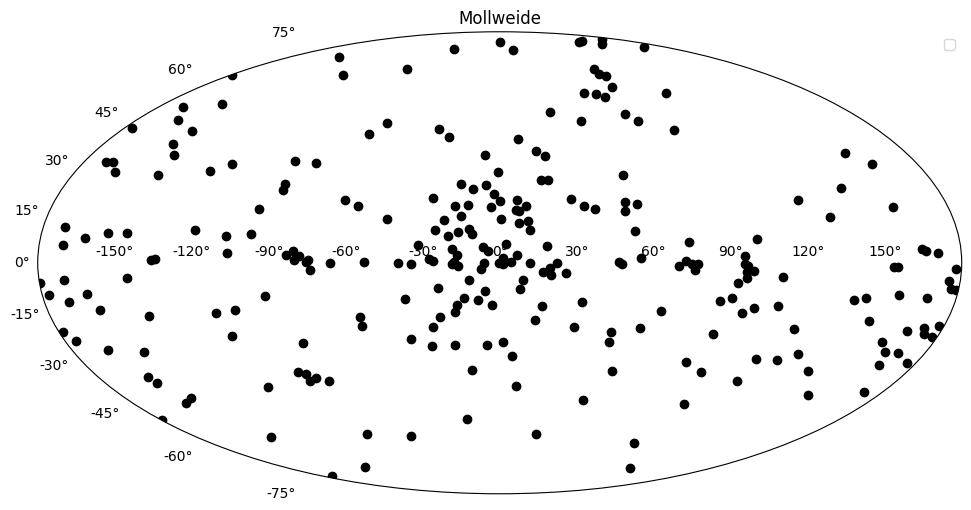

In [11]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111, projection="mollweide")
plt.title("Mollweide")
ax.scatter(-df_egretCoords.galactic.l.wrap_at(180.*u.degree).radian,
           df_egretCoords.galactic.b.radian, c="black", marker='o')
plt.grid(False)
ax.legend(loc=1)

Since we want to identify the type of each source in the sky, we’ll save the coordinates of each type in a separate variable and plot them. Additionally, we’ll use MWSkyMap to visualize the sky with a gamma-ray background.

In [12]:
coord_u = df_egretCoords[df_egret['ID']=='U']
coord_a = df_egretCoords[(df_egret['ID']=='A') | (df_egret['ID']=='a')]
coord_s = df_egretCoords[df_egret['ID']=='S']
coord_p = df_egretCoords[df_egret['ID']=='P']
coord_g = df_egretCoords[df_egret['ID']=='G']

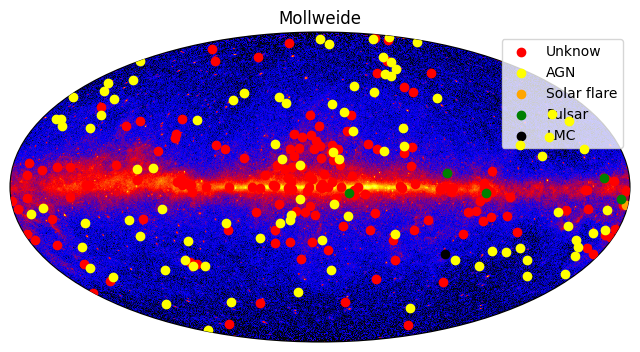

In [65]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
plt.title("Mollweide")

ax.scatter(-coord_u.galactic.l.wrap_at(180.*u.degree).radian,
           coord_u.galactic.b.radian, c="red", marker='o', zorder=10, label='Unknow')
ax.scatter(-coord_a.galactic.l.wrap_at(180.*u.degree).radian,
           coord_a.galactic.b.radian, c="yellow", marker='o', zorder=21, label='AGN')
ax.scatter(-coord_s.galactic.l.wrap_at(180.*u.degree).radian,
           coord_s.galactic.b.radian, c="orange", marker='o', zorder=32, label='Solar flare')
ax.scatter(-coord_p.galactic.l.wrap_at(180.*u.degree).radian,
           coord_p.galactic.b.radian, c="green", marker='o', zorder=42, label='Pulsar')
ax.scatter(-coord_g.galactic.l.wrap_at(180.*u.degree).radian,
           coord_g.galactic.b.radian, c="black", marker='o', zorder=52, label='LMC')

mw1 = MWSkyMap(projection="mollweide", background="gamma")
mw1.transform(ax)

plt.grid(False)
ax.legend(loc=1)

We observe that the majority of sources correspond to unknown events and AGNs, with the unknown sources being predominantly located within the Milky Way itself.

## pyWWT

Using pyWWT, we'll visualize these sources interactively in the sky through the WorldWide Telescope viewer. First, we'll connect to the WWT application via "connect_to_app()". Then, we can manage the viewer's layers containing the catalog using "layer_controls".

In [88]:
wwt = await connect_to_app().becomes_ready(20)

In [89]:
wwt.layer_controls

First, we'll display all sources without distinction in the viewer using default controls.

In [68]:
egret_layer = wwt.layers.add_table_layer(table=egret[0], frame='Sky',
                                         lon_att='RAJ2000', lat_att='DEJ2000')
egret_layer

<TableLayer with 271 markers>

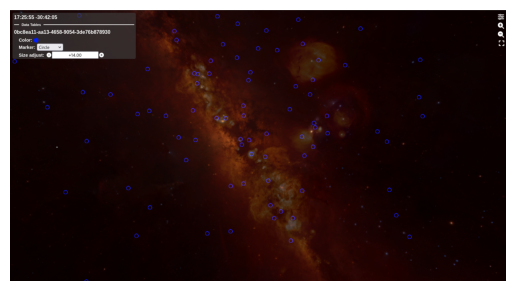

In [70]:
img = mpimg.imread('pywwt1.png')
plt.imshow(img)
plt.axis('off') 
plt.show()

We will now proceed to identify the sources.

In [74]:
wwt = await connect_to_app().becomes_ready(20)
wwt.layer_controls
source_colors = {
    'P': 'red',
    'A': 'orange',
    'a': 'yellow',
    'S': 'green',
    'G': 'blue',
    'U': 'gray'
}
for source_type, color in source_colors.items():
    df_sub = df_egret[df_egret['ID'] == source_type]
  
    if df_sub.empty:
        continue  
    table_sub = Table.from_pandas(df_sub)
    layer = wwt.layers.add_table_layer(
        table=table_sub,
        frame='Sky',
        lon_att='RAJ2000',
        lat_att='DEJ2000'
    )
    layer.name = f"EGRET - {source_type}"
    try:
        layer.color = color
    except Exception:
        print(f"No se pudo asignar color a la capa {source_type}")


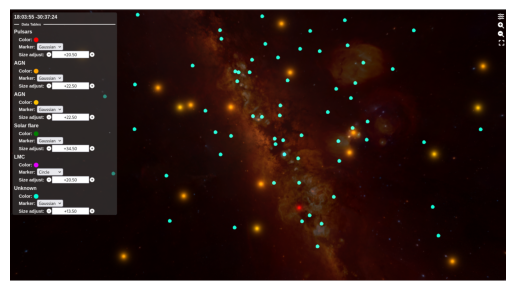

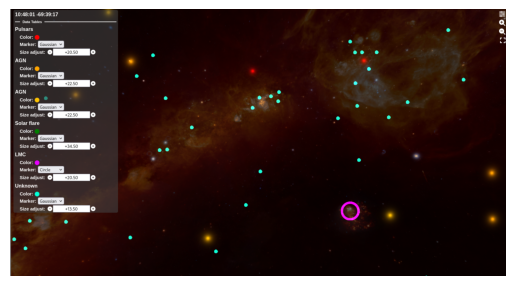

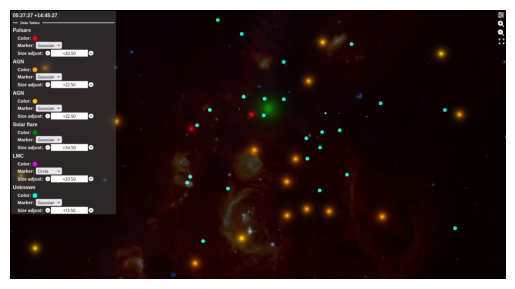

In [90]:
img = mpimg.imread('pywwt2.png')
plt.imshow(img)
plt.axis('off') 
plt.show()
img = mpimg.imread('pywwt3.png')
plt.imshow(img)
plt.axis('off') 
plt.show()
img = mpimg.imread('pywwt4.png')
plt.imshow(img)
plt.axis('off') 
plt.show()

# BATSE

We will follow the same procedure as for EGRET and compare the results. Unlike EGRET, BATSE focuses more on transient gamma-ray emissions at lower energies. We will begin by obtaining the catalog data in the same manner as with EGRET.

In [8]:
catalog_list = vizier.find_catalogs('batse')
for k, v in catalog_list.items():
    print(k, ":", v.description)

IX/20A : The Fourth BATSE Burst Revised Catalog (Paciesas+ 1999)


We take the one corresponding to IX/20A.

In [9]:
vizier.ROW_LIMIT = -1
batse = vizier.get_catalogs("IX/20A")
batse

TableList with 6 tables:
	'0:IX/20A/batse' with 8 column(s) and 2704 row(s) 
	'1:IX/20A/4brcom' with 3 column(s) and 3061 row(s) 
	'2:IX/20A/duration' with 7 column(s) and 2041 row(s) 
	'3:IX/20A/flux' with 7 column(s) and 2135 row(s) 
	'4:IX/20A/maxmin' with 7 column(s) and 1323 row(s) 
	'5:IX/20A/ulysses' with 5 column(s) and 147 row(s) 

From the previous tables, we are interested in the first and fourth ones. The first table contains the primary information, such as the burst time and its sky position. The fourth table provides the photometric data, i.e., the energy band fluxes along with their associated errors.

In [10]:
df_batse = batse[0].to_pandas()
df_batse2 = batse[3].to_pandas()

In [11]:
df_batse

,TrigNo,4B,Uflag,JD,Time,RAJ2000,DEJ2000,GLON
0,105,4B 910421,,2448367.5,33243.756,270.679993,24.760000,50.750000
1,107,4B 910423,,2448369.5,71684.716,193.470001,-8.380000,303.970001
2,108,4B 910424,,2448370.5,71006.572,201.309998,-45.410000,309.130005
3,109,4B 910425,,2448371.5,2265.707,91.290001,-22.770000,228.990005
4,110,4B 910425B,,2448371.5,20253.291,335.940002,25.770000,85.830002
...,...,...,...,...,...,...,...,...
2699,8112,GRB 000520,,2480536.3,234.740,234.740005,-0.310000,5.640000
2700,8113,GRB 000521,,2475266.3,5.960,5.960000,-6.250000,104.250000
2701,8116,GRB 000524,,2440546.0,109.190,109.190002,-41.360001,252.929993
2702,8120,GRB 000525,,2477454.2,280.220,280.220001,-39.439999,355.920013


In [12]:
df_batse2

,TrigNo,F1,e_F1,F2,e_F2,F3,e_F3
0,105,8.685000e-07,1.089000e-08,1.321000e-06,1.437000e-08,2.047000e-06,1.793000e-07
1,107,5.503000e-08,9.823000e-09,5.692000e-08,1.032000e-08,5.924000e-08,2.003000e-08
2,108,8.286000e-09,6.060000e-09,1.495000e-08,5.220000e-09,3.199000e-08,1.236000e-08
3,109,4.425000e-06,3.965000e-08,7.308000e-06,4.952000e-08,1.765000e-05,1.210000e-07
4,110,4.503000e-07,3.662000e-08,4.673000e-07,4.065000e-08,1.777000e-06,1.401000e-07
...,...,...,...,...,...,...,...
2130,8111,9.579001e-07,2.569000e-08,9.866000e-07,1.931000e-08,3.011000e-06,5.893000e-08
2131,8112,1.295000e-07,1.735000e-08,1.496000e-07,1.429000e-08,3.031000e-07,3.586000e-08
2132,8116,9.395000e-07,3.259000e-08,1.706000e-06,3.376000e-08,5.341000e-06,9.228000e-08
2133,8120,3.056000e-08,5.046000e-09,5.819000e-08,5.329000e-09,4.285000e-07,1.552000e-08


With SkyCoord, we will locate the sources in the sky by providing their Right Ascension and Declination values in degrees. This will create an object that we can use for visualization.

In [13]:
df_batseCoords = SkyCoord(df_batse['RAJ2000'], df_batse['DEJ2000'], 
                          unit=(u.degree, u.degree), frame='icrs')

As with EGRET, we plot the gamma-ray detections in the Mollweide projection. However, in this case there is no distinction between source types - we will only differentiate them by their time of occurrence.

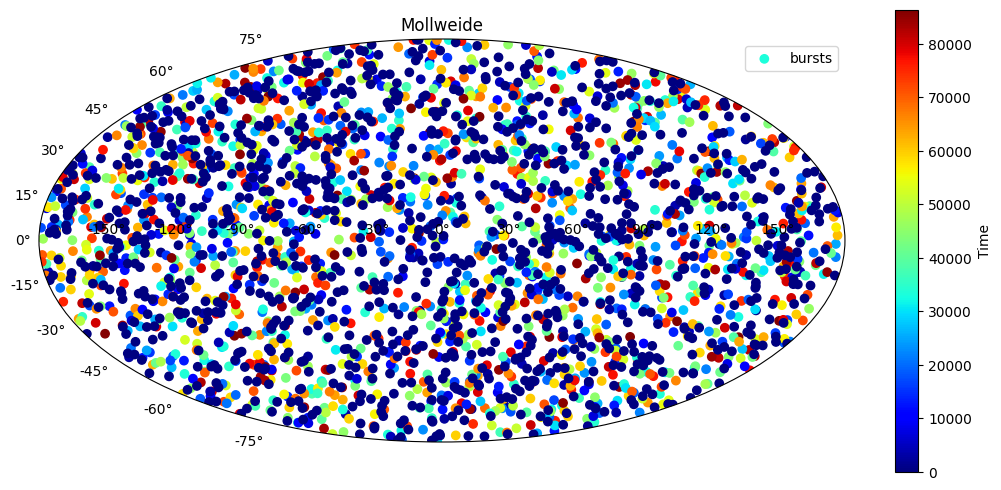

In [14]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111, projection="mollweide")
plt.title("Mollweide")
ec = ax.scatter(-df_batseCoords.galactic.l.wrap_at(180.*u.degree).radian,
           df_batseCoords.galactic.b.radian, marker='o', c = df_batse['Time'], cmap='jet', label='bursts')

cbar = plt.colorbar(ec)
cbar.set_label('Time')
ax.legend(loc=1)

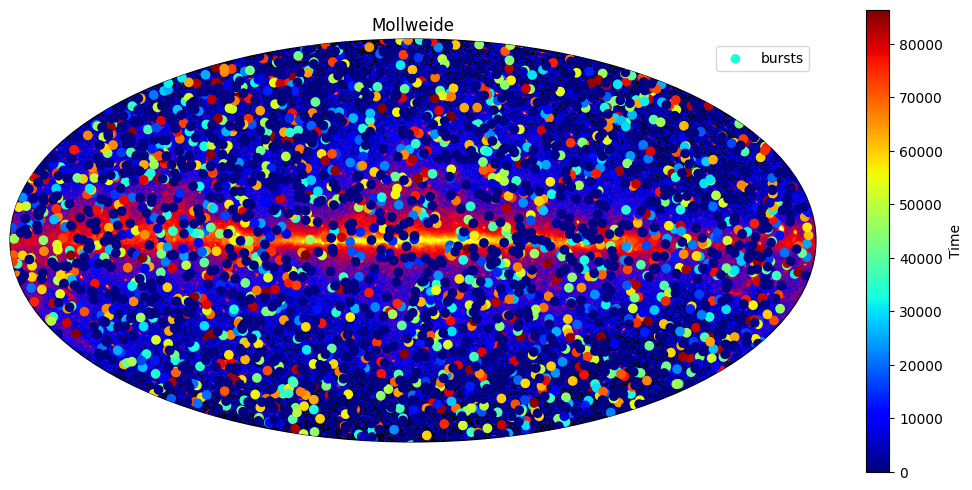

In [15]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111, projection="mollweide")
plt.title("Mollweide")
ec = ax.scatter(-df_batseCoords.galactic.l.wrap_at(180.*u.degree).radian,
           df_batseCoords.galactic.b.radian, marker='o', c = df_batse['Time'], cmap='jet', label='bursts', zorder=100)

mw1 = MWSkyMap(projection="mollweide", background="gamma")
mw1.transform(ax)

cbar = plt.colorbar(ec)
cbar.set_label('Time')
plt.grid(False)
ax.legend(loc=1)


Since we want to visualize it as a function of flux, we'll need to take both tables and merge them using "pd.merge".

In [16]:
left = pd.DataFrame(df_batse)
right= pd.DataFrame(df_batse2)
df_batse3 = pd.merge(left, right)
df_batse3

,TrigNo,4B,Uflag,JD,Time,RAJ2000,DEJ2000,GLON,F1,e_F1,F2,e_F2,F3,e_F3
0,105,4B 910421,,2448367.5,33243.756,270.679993,24.760000,50.750000,8.685000e-07,1.089000e-08,1.321000e-06,1.437000e-08,2.047000e-06,1.793000e-07
1,107,4B 910423,,2448369.5,71684.716,193.470001,-8.380000,303.970001,5.503000e-08,9.823000e-09,5.692000e-08,1.032000e-08,5.924000e-08,2.003000e-08
2,108,4B 910424,,2448370.5,71006.572,201.309998,-45.410000,309.130005,8.286000e-09,6.060000e-09,1.495000e-08,5.220000e-09,3.199000e-08,1.236000e-08
3,109,4B 910425,,2448371.5,2265.707,91.290001,-22.770000,228.990005,4.425000e-06,3.965000e-08,7.308000e-06,4.952000e-08,1.765000e-05,1.210000e-07
4,110,4B 910425B,,2448371.5,20253.291,335.940002,25.770000,85.830002,4.503000e-07,3.662000e-08,4.673000e-07,4.065000e-08,1.777000e-06,1.401000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,8111,GRB 000519,,2469888.2,346.030,346.029999,3.330000,78.400002,9.579001e-07,2.569000e-08,9.866000e-07,1.931000e-08,3.011000e-06,5.893000e-08
2131,8112,GRB 000520,,2480536.3,234.740,234.740005,-0.310000,5.640000,1.295000e-07,1.735000e-08,1.496000e-07,1.429000e-08,3.031000e-07,3.586000e-08
2132,8116,GRB 000524,,2440546.0,109.190,109.190002,-41.360001,252.929993,9.395000e-07,3.259000e-08,1.706000e-06,3.376000e-08,5.341000e-06,9.228000e-08
2133,8120,GRB 000525,,2477454.2,280.220,280.220001,-39.439999,355.920013,3.056000e-08,5.046000e-09,5.819000e-08,5.329000e-09,4.285000e-07,1.552000e-08


We repeat the process for two flux bands.

In [17]:
df_batse3Coords = SkyCoord(df_batse3['RAJ2000'], df_batse3['DEJ2000'], 
                          unit=(u.degree, u.degree), frame='icrs')

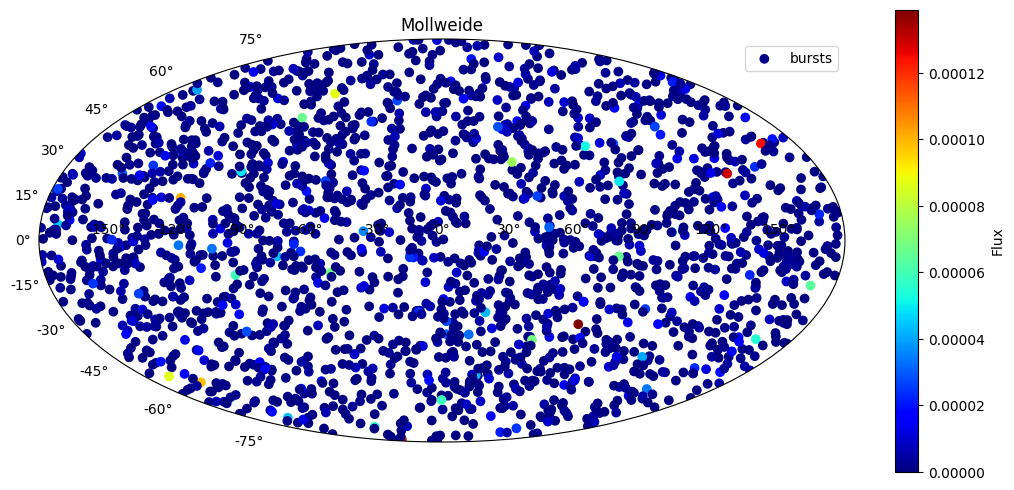

In [19]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111, projection="mollweide")
plt.title("Mollweide")
ec=ax.scatter(-df_batse3Coords.galactic.l.wrap_at(180.*u.degree).radian,
           df_batse3Coords.galactic.b.radian, marker='o', c = df_batse3['F3'], cmap='jet', label='bursts')

cbar = plt.colorbar(ec)
cbar.set_label('Flux')
ax.legend(loc=1)

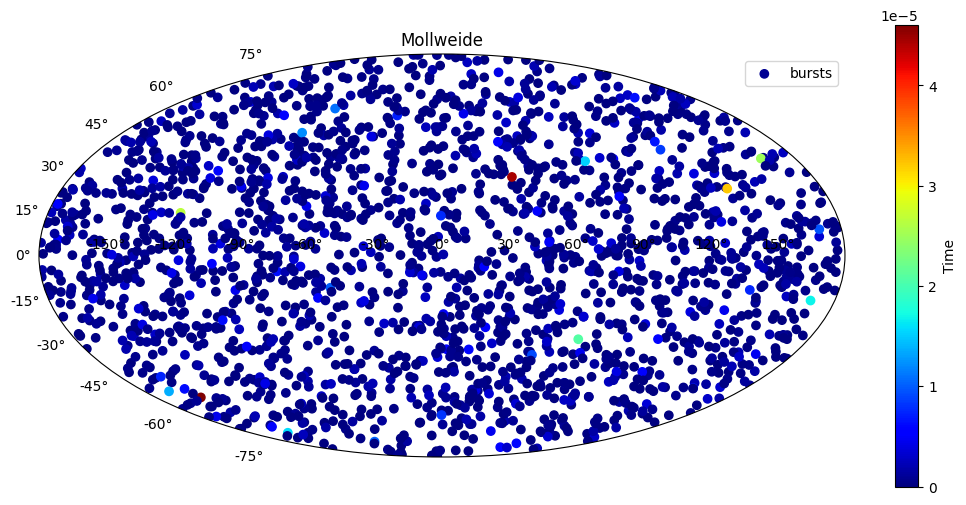

In [20]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111, projection="mollweide")
plt.title("Mollweide")
ec=ax.scatter(-df_batse3Coords.galactic.l.wrap_at(180.*u.degree).radian,
           df_batse3Coords.galactic.b.radian, marker='o', c = df_batse3['F1'], cmap='jet', label='bursts')

cbar = plt.colorbar(ec)
cbar.set_label('Time')
ax.legend(loc=1)

## pyWWT

We again visualize the gamma-ray bursts in WWT 

In [21]:
wwt = await connect_to_app().becomes_ready(20)

In [22]:
wwt.layer_controls

In [23]:
batse_layer = wwt.layers.add_table_layer(table=batse[0], frame='Sky',
                                         lon_att='RAJ2000', lat_att='DEJ2000')
batse_layer

<TableLayer with 2704 markers>

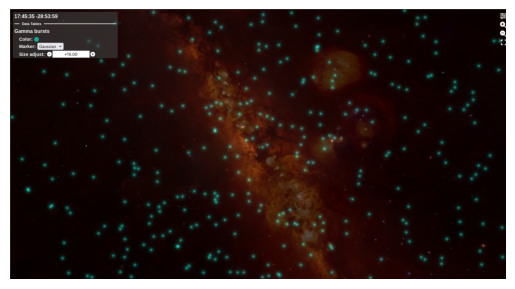

In [26]:
img = mpimg.imread('pywwt5.png')
plt.imshow(img)
plt.axis('off') 
plt.show()

# Fermi

The Fermi experiment is significantly more precise than BATSE, enabling us to analyze gamma-ray energy pulses as a function of time.

First, we will download two specific files from the directory where Fermi/GBM publishes its gamma-ray data, as specified in 'file_fit' and 'file_pha'. The 'file_fit' contains individual events that we will use for spectral analysis, while 'file_pha' provides energy-channel count rates that will be used to generate light curves.

In [33]:
trigger='211211549'
date='2021'

In [34]:
import urllib.request

trigger_ = trigger
year_    = date

path_ = f'https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/{year_}/bn{trigger_}/current/'
file_fit = f'glg_tte_na_bn{trigger_}_v00.fit'
file_pha = f'glg_ctime_nb_bn{trigger_}_v00.pha'

urllib.request.urlretrieve(path_+file_fit, file_fit)
urllib.request.urlretrieve(path_+file_pha, file_pha)

('glg_ctime_nb_bn211211549_v00.pha',
 <http.client.HTTPMessage at 0x7f9f27278690>)

We open the previously downloaded TTE file.

In [4]:
tte = GbmTte.open('glg_tte_na_bn211211549_v00.fit')
tte

No.,Name,Ver,Type,Cards,Dimensions
0,PRIMARY,1,PrimaryHDU,30,()
1,EBOUNDS,1,BinTableHDU,47,128R x 3C
2,EVENTS,1,BinTableHDU,42,1024138R x 2C
3,GTI,1,BinTableHDU,42,1R x 2C


We observe a valid data interval spanning from 132 seconds before to 482 seconds after

In [5]:
tte.gti

<Gti: 1 intervals; range (-132.336874127388, 482.07243597507477)>

Total time range covered by individual events

In [6]:
tte.time_range

(np.float64(-132.336874127388), np.float64(482.07243597507477))

Total energy range covered by individual events

In [7]:
tte.energy_range

(3.668320417404175, 2000.0)

Number of energy channels contained in the TTE file

In [8]:
tte.num_chans

128

We focus on event data between -10.0 and 10.0 seconds relative to the detection time.

In [9]:
time_slice_tte = tte.slice_time((-10.0, 10.0))
print(time_slice_tte)

<GbmTte: 
 trigger time: 660921004.65092;
 time range (np.float64(-9.999744057655334), np.float64(9.999860048294067));
 energy range (3.668320417404175, 2000.0)>


We can also examine events with energies between 50 keV and 300 keV.

In [10]:
energy_slice_tte = tte.slice_energy((50.0, 300.0))
print(energy_slice_tte)

<GbmTte: 
 trigger time: 660921004.65092;
 time range (np.float64(-132.33558213710785), np.float64(482.07243597507477));
 energy range (48.87697219848633, 303.12591552734375)>


We will now convert the TTE data into an energy-channel count spectrum over time (PHAII).

In [11]:
phaii = tte.to_phaii(bin_by_time, 1.024, time_ref=0.0)
print(phaii)

<GbmPhaii: 
 trigger time: 660921004.65092;
 time range (np.float64(-133.12), np.float64(482.30400000000003));
 energy range (np.float64(3.668320417404175), np.float64(2000.0))>


We now display the temporal evolution of photons detected within the aforementioned energy range. The burst peak appears to occur at approximately 8 seconds.

(-10.0, 100.0)

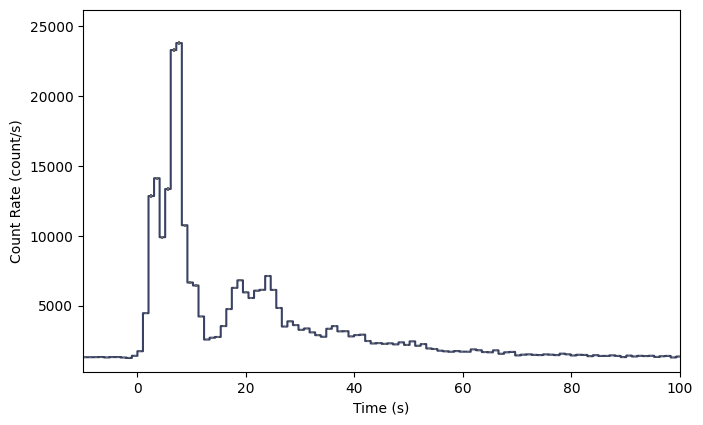

In [12]:
lcplot = Lightcurve(data=phaii.to_lightcurve())
plt.xlim(-10, 100)

We select two time intervals where the plot shows two distinct energy peaks - the primary (main) peak followed by a secondary peak of lower intensity.

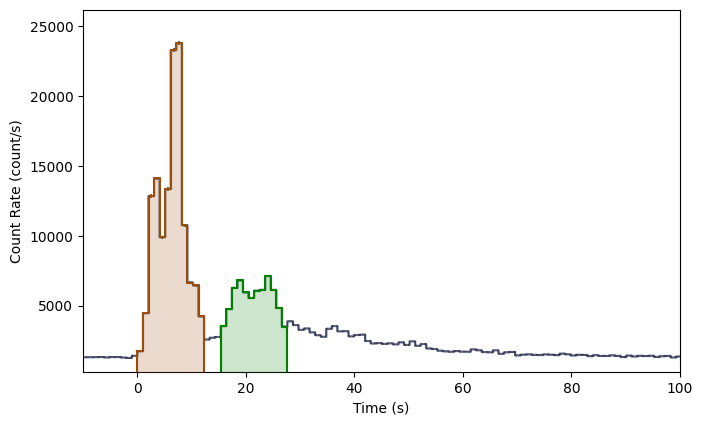

In [13]:
lcplot = Lightcurve(data=phaii.to_lightcurve())
plt.xlim(-10, 100)
lc_select=phaii.to_lightcurve(time_range = (0, 12.0))
lcplot.add_selection(lc_select)

lc_select2=phaii.to_lightcurve(time_range=(16, 27))
lcplot.add_selection(lc_select2)
lcplot.selections[1].color = 'green'

For the first peak, we generate the energy spectrum from TTE data, obtaining the photon energy distribution between 0.0 and 12.0 seconds.

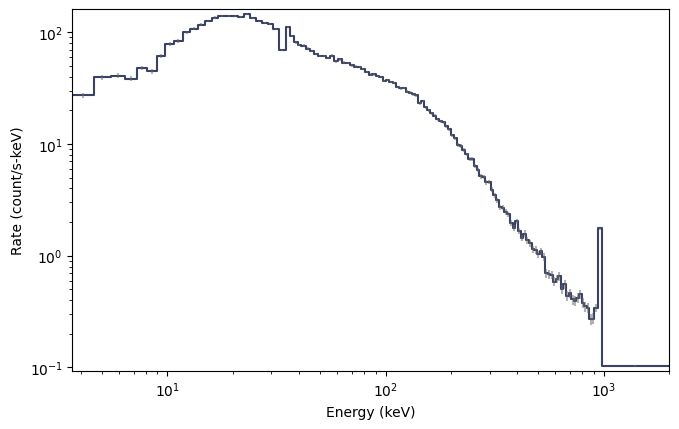

In [14]:
spectrum = tte.to_spectrum(time_range=(0.0, 12.0))
specplot1 = Spectrum(data=spectrum)
plt.show()

For the same peak, we generate another spectrum, this time binning every 4 channels to reduce noise.

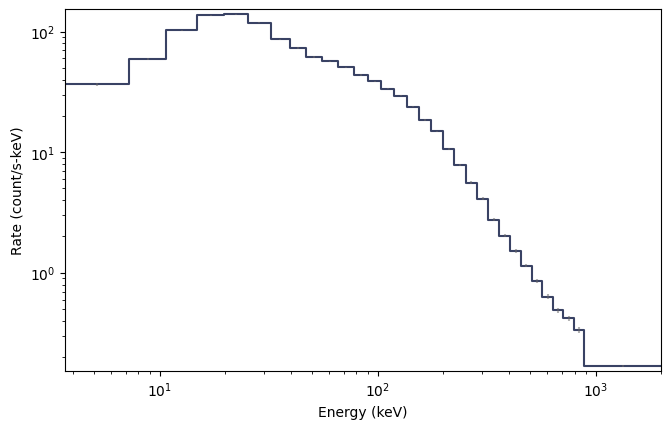

In [15]:
rebinned_energy = tte.rebin_energy(combine_by_factor, 4)
rebinned_spectrum = rebinned_energy.to_spectrum(time_range=(0.0, 12.0))
specplot2 = Spectrum(data=rebinned_spectrum)
plt.show()

We now compare the spectra for each peak. Both spectral shapes are similar, but as expected, the first peak shows higher values than the second peak in the higher energy range.

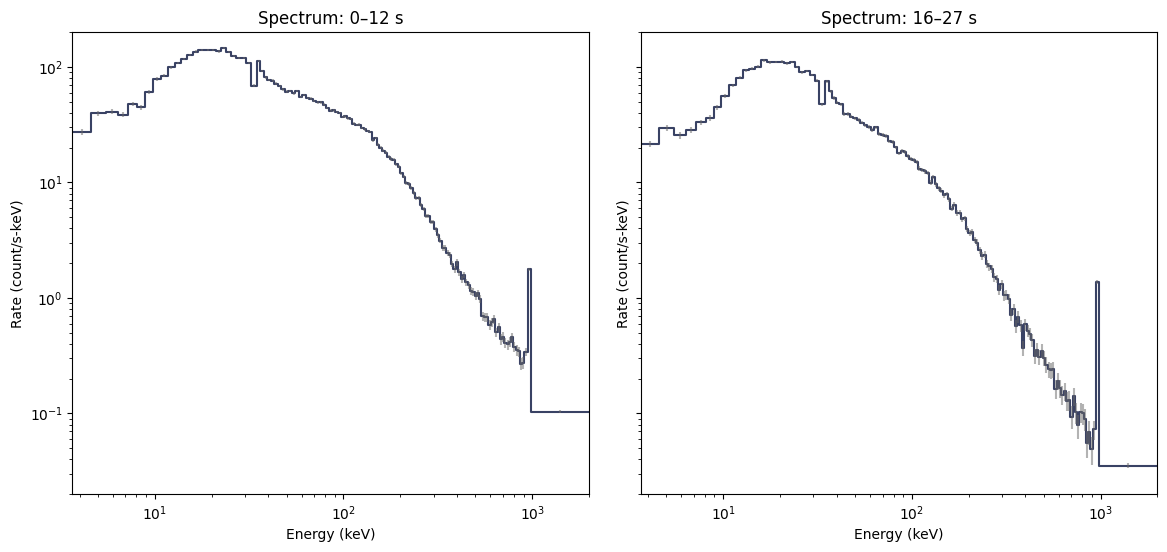

In [16]:
fig = plt.figure(figsize=(14,6))
gs = fig.add_gridspec(1, 2, hspace=0, wspace=0.1)
(ax1, ax2)= gs.subplots(sharex='col', sharey='row')
spectrum1 = tte.to_spectrum(time_range=(0.0, 12.0))
specplot1 = Spectrum(data=spectrum1, ax=ax1)
ax1.set_title("Spectrum: 0–12 s")
spectrum2 = tte.to_spectrum(time_range=(16.0, 27.0))
specplot2 = Spectrum(data=spectrum2, ax=ax2)
ax2.set_title("Spectrum: 16–27 s")
[axx.set_ylim(0.02, 200) for axx in [ax1, ax2]];

To facilitate comparison, we overlay both spectra, clearly showing the first peak is more energetic than the second.

(0.02, 200)

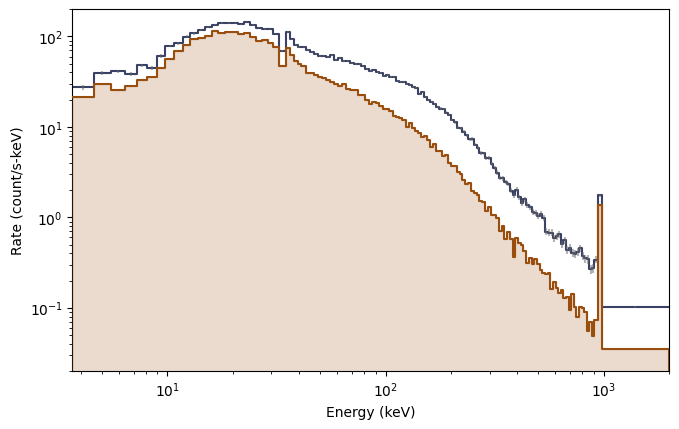

In [17]:
spectrum3 = tte.to_spectrum(time_range=(16, 27))
specplot= Spectrum(data=spectrum1)
specplot.add_selection(spectrum3)
plt.ylim(0.02, 200)

# Conclusion

In this work, we have compared the different capabilities of the EGRET, BATSE, and Fermi experiments for gamma-ray analysis. Using EGRET, we localized highly energetic phenomena in the sky – including pulsars, AGNs, solar flares, and unknown sources – visualized through both Mollweide projections and the WorldWide Telescope (WWT). Similarly, we identified transient phenomena with BATSE, resulting in a high number of detections.

Fermi, on the other hand, enabled more detailed studies. Specifically, we analyzed the spectrum of two peaks from a gamma-ray detection, for which we first downloaded the data directly via Python.